# Connection Viya and Python

In [1]:
# library import
import os
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
import swat

os.environ['CAS_CLIENT_SSL_CA_LIST'] = r'C:\Users\korbsl\OneDrive - SAS\Backup\800_Install\20_Python\trustedcerts.pem'

hostname = 'casc.kolon.com'
port = 8777
username = 'viya_sask01'
password = 'viya'

# Connect to CAS
sess = swat.CAS(hostname = hostname,
                port = port,
                username = username,
                password = password,
                protocol = 'https')
# serverStatus action in builtins action set
print(sess.builtins.serverStatus())
print(sess)


NOTE: Grid node action status report: 5 nodes, 9 total actions executed.
[About]

 {'CAS': 'Cloud Analytic Services',
  'Copyright': 'Copyright Â© 2014-2018 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2019-04-16T00:18:40Z',
  'System': {'Hostname': 'casc',
   'Linux Distribution': 'Red Hat Enterprise Linux Server release 7.4 (Maipo)',
   'Model Number': 'x86_64',
   'OS Family': 'LIN X64',
   'OS Name': 'Linux',
   'OS Release': '3.10.0-693.el7.x86_64',
   'OS Version': '#1 SMP Thu Jul 6 19:56:57 EDT 2017'},
  'Version': '3.04',
  'VersionLong': 'V.03.04M0P07122018',
  'license': {'expires': '30Jun2019:00:00:00',
   'gracePeriod': 0,
   'maxCPUs': 100,
   'site': 'DEMO CENTER-VIYA',
   'siteNum': 70232805,
   'warningPeriod': 30}}

[nodestatus]

 Node Status
 
               name        role  uptime  running  stalled
 0  casw1.kolon.com      worker   3.596        0        0
 1  casw2.kolon.com      worker   3.596        0        0
 2  casw3.kolon.com      worker   3.596 

In [16]:
# conn.terminate() 

## DLpy

In [4]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

import dlpy
from dlpy.images import ImageTable
from dlpy.splitting import *

# Import DLPy model functions
from dlpy import Model, Sequential

# Import DLPy layer functions
from dlpy.layers import *

# Import DLPy application functions
from dlpy.applications import *

### Image Processing

In [5]:
CIFAR10_train = ImageTable.load_files(sess, path='/home/viya_sask01/korbsl/VDMML_training/data/image_data/CIFAR10/train', casout=dict(name='CIFAR10_train'))
CIFAR10_test = ImageTable.load_files(sess, path='/home/viya_sask01/korbsl/VDMML_training/data/image_data/CIFAR10/test', casout=dict(name='CIFAR10_test'))

In [6]:
CIFAR10_train.head()

,_image_,_label_,_filename_0,_id_
0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,dog,puppy_s_000380.png,29151
1,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,cat,tabby_cat_s_001880.png,18404
2,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,dog,puppy_s_000443.png,29166
3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,deer,cervus_elaphus_s_001640.png,21214
4,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,dog,english_toy_spaniel_s_000633.png,26302


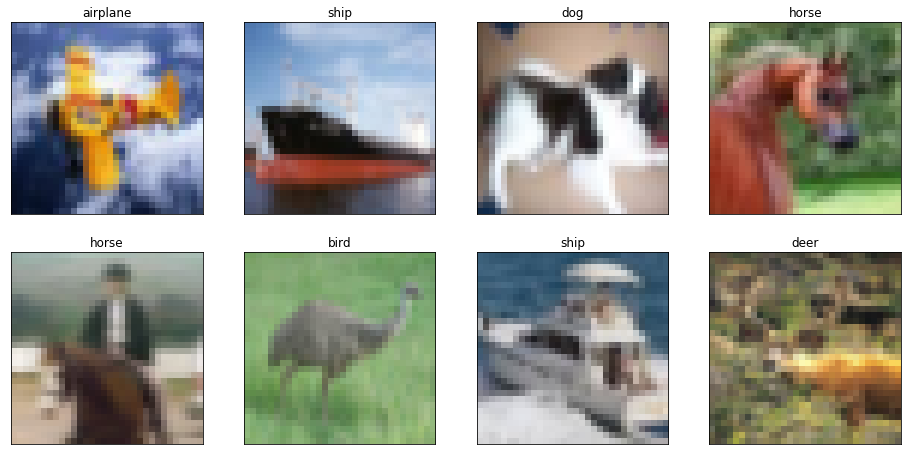

In [7]:
CIFAR10_train.show(nimages=8, ncol=4, randomize=True)

In [8]:
CIFAR10_train.label_freq

,Level,Frequency
airplane,1,5000
automobile,2,5000
bird,3,5000
cat,4,5000
deer,5,5000
dog,6,5000
frog,7,5000
horse,8,5000
ship,9,5000
truck,10,5000


In [9]:
CIFAR10_train.image_summary

jpg                 50000
minWidth               32
maxWidth               32
minHeight              32
maxHeight              32
meanWidth              32
meanHeight             32
mean1stChannel    113.865
min1stChannel           0
max1stChannel         255
mean2ndChannel     122.95
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    125.307
min3rdChannel           0
max3rdChannel         255
dtype: object

### Prepare Data

In [10]:
CIFAR10_train.shuffle(casout=dict(name='CIFAR10_train', replace=True))
CIFAR10_test.shuffle(casout=dict(name='CIFAR10_train', replace=True))

[caslib]

 'CASUSERHDFS(viya_sask01)'

[tableName]

 'CIFAR10_TRAIN'

[casTable]

 CASTable('CIFAR10_TRAIN', caslib='CASUSERHDFS(viya_sask01)')

+ Elapsed: 0.0939s, user: 0.0573s, sys: 0.318s, mem: 167mb

In [ ]:
# train_data, test_data = two_way_split(CIFAR10_train, test_rate=20, seed=12345)

### CNN Model

In [11]:
# Use DLPy to create a sequential model and name it 'Simple_CNN' 
model1 = Sequential(sess, model_table = 'Simple_CNN')

In [12]:

model1.add(InputLayer(n_channels=3,width=32,height=32,name='input1',std='std' ,offsets={113.858255,123.037591,125.418915}))

model1.add(Conv2d(n_filters=32, width=5, height=5, stride=1, name='conv1',init='XAVIER', act='RELU', init_bias=0.1, include_bias=True))
model1.add(Pooling(width=3, height=3, stride=2, pool='MAX', padding=None, name='pool1'))

model1.add(Conv2d(n_filters=64, width=5, height=5, stride=1, name='conv2',init='XAVIER', act='RELU', init_bias=0.1, include_bias=True))
model1.add(Pooling(width=3, height=3, stride=2, pool='MAX', padding=None, name='pool2'))

model1.add(Conv2d(n_filters=128, width=3, height=3, stride=1, name='conv3',init='XAVIER', act='RELU', init_bias=0.1, include_bias=True))
model1.add(Conv2d(n_filters=128, width=3, height=3, stride=1, name='conv4',init='XAVIER', act='RELU', init_bias=0.1, include_bias=True))
model1.add(Conv2d(n_filters=128, width=3, height=3, stride=1, name='conv5',init='XAVIER', act='RELU', init_bias=0.1, include_bias=True))

model1.add(Dense(n=384, name='fc1', act='relu', init='XAVIER', init_bias=0.1, include_bias=True, dropout=0.2))

model1.add(OutputLayer(name='output1', act='softmax', n=10))

model1.print_summary()

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,0,input1,input,,,None,"(32, 32, 3)","(0, 0)"
1,1,conv1,convo,"(5, 5)",1,Relu,"(32, 32, 32)","(2400, 32)"
2,2,pool1,pool,"(3, 3)",2,Max,"(16, 16, 32)","(0, 0)"
3,3,conv2,convo,"(5, 5)",1,Relu,"(16, 16, 64)","(51200, 64)"
4,4,pool2,pool,"(3, 3)",2,Max,"(8, 8, 64)","(0, 0)"
5,5,conv3,convo,"(3, 3)",1,Relu,"(8, 8, 128)","(73728, 128)"
6,6,conv4,convo,"(3, 3)",1,Relu,"(8, 8, 128)","(147456, 128)"
7,7,conv5,convo,"(3, 3)",1,Relu,"(8, 8, 128)","(147456, 128)"
8,8,fc1,fc,"(8192, 384)",,Relu,384,"(3145728, 384)"
9,9,output1,output,"(384, 10)",,Softmax,10,"(3840, 10)"


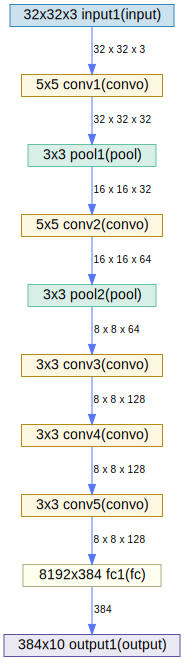

In [13]:
model1.plot_network()

In [21]:
model1.fit(data=CIFAR10_train, 
          mini_batch_size=32,
          max_epochs=10,
          log_level=2,
          lr=1e-4)

NOTE: Inputs=_image_ is used
NOTE: Training based on existing weights.
NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 3572682.
NOTE:  The approximate memory cost is 1532.00 MB.
NOTE:  Loading weights cost       0.14 (s).
NOTE:  Initializing each layer cost       0.21 (s).
NOTE:  The total number of workers is 4.
NOTE:  The total number of threads on each worker is 40.
NOTE:  The total mini-batch size per thread on each worker is 32.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 5120.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:     10
NOTE:  Levels for the target variable:
NOTE:  Level      0: airplane  
NOTE:  Level      1: automobile
NOTE:  Level      2: bird      
NOTE:  Level      3: cat       
NOTE:  Level      4: deer      
NOTE:  Level      5: dog       
NOTE:  Level      6: frog      
NOTE:  Level      7: horse     
NOTE:  Level      8: ship      
NOTE:  Level      9: truck

,Descr,Value
0,Model Name,simple_cnn
1,Model Type,Convolutional Neural Network
2,Number of Layers,10
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,5
6,Number of Pooling Layers,2
7,Number of Fully Connected Layers,1
8,Number of Weight Parameters,3571808
9,Number of Bias Parameters,874


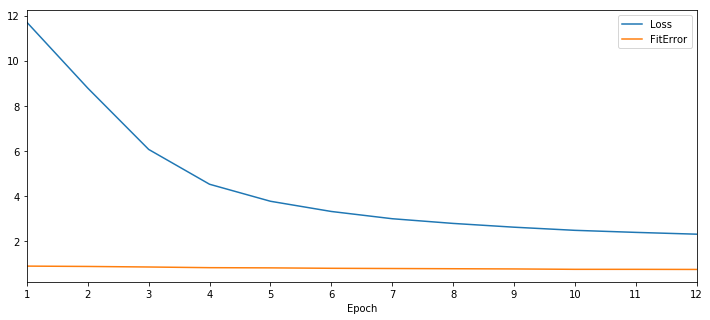

In [22]:
model1.plot_training_history(fig_size=(15,6))

In [23]:
model1.evaluate(CIFAR10_test)

[OutputCasTables]

                      casLib              Name   Rows  Columns  \
 0  CASUSERHDFS(viya_sask01)  Valid_Res_ypDNiR  10000       17   
 
                                             casTable  
 0  CASTable('Valid_Res_ypDNiR', caslib='CASUSERHD...  

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read         10000
 1  Number of Observations Used         10000
 2  Misclassification Error (%)          71.2
 3                   Loss Error      2.077391

+ Elapsed: 0.645s, user: 42.5s, sys: 1.82s, mem: 1.14e+03mb

In [29]:
model1.valid_conf_mat

,_label_,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,airplane,469.0,69.0,70.0,39.0,21.0,37.0,27.0,64.0,143.0,61.0
1,automobile,106.0,278.0,54.0,78.0,21.0,56.0,74.0,101.0,74.0,158.0
2,bird,115.0,54.0,195.0,77.0,128.0,127.0,140.0,103.0,24.0,37.0
3,cat,58.0,51.0,121.0,146.0,101.0,171.0,135.0,126.0,31.0,60.0
4,deer,58.0,42.0,144.0,82.0,184.0,113.0,158.0,157.0,24.0,38.0
5,dog,50.0,35.0,119.0,104.0,70.0,295.0,100.0,168.0,23.0,36.0
6,frog,32.0,40.0,104.0,56.0,111.0,97.0,425.0,93.0,5.0,37.0
7,horse,58.0,43.0,83.0,77.0,93.0,140.0,83.0,319.0,35.0,69.0
8,ship,218.0,124.0,50.0,40.0,16.0,49.0,25.0,66.0,309.0,103.0
9,truck,87.0,200.0,55.0,66.0,16.0,51.0,63.0,117.0,85.0,260.0


### VGG16 Model

In [18]:
model_vgg16 = VGG16(
    sess,
    model_table='VGG16_notop',
    n_classes=10,
    n_channels=3,
    width=32,
    height=32,
    scale=1,
    offsets=CIFAR10_train.channel_means)

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Fully-connected layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


In [19]:
model_vgg16.print_summary()

,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,0,Input1,input,,,None,"(32, 32, 3)","(0, 0)"
1,1,Convo.1,convo,"(3, 3)",1,Relu,"(32, 32, 64)","(1728, 64)"
2,2,Convo.2,convo,"(3, 3)",1,Relu,"(32, 32, 64)","(36864, 64)"
3,3,Pool1,pool,"(2, 2)",2,Max,"(16, 16, 64)","(0, 0)"
4,4,Convo.3,convo,"(3, 3)",1,Relu,"(16, 16, 128)","(73728, 128)"
5,5,Convo.4,convo,"(3, 3)",1,Relu,"(16, 16, 128)","(147456, 128)"
6,6,Pool2,pool,"(2, 2)",2,Max,"(8, 8, 128)","(0, 0)"
7,7,Convo.5,convo,"(3, 3)",1,Relu,"(8, 8, 256)","(294912, 256)"
8,8,Convo.6,convo,"(3, 3)",1,Relu,"(8, 8, 256)","(589824, 256)"
9,9,Convo.7,convo,"(3, 3)",1,Relu,"(8, 8, 256)","(589824, 256)"


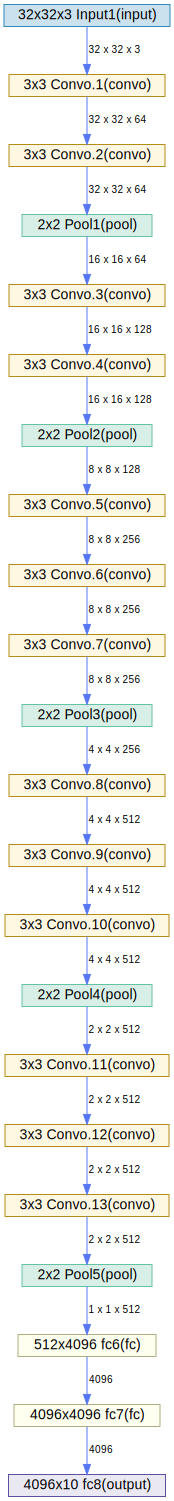

In [20]:
model_vgg16.plot_network()

In [33]:
model_vgg16.fit(data=CIFAR10_train,
                mini_batch_size=32,
                max_epochs=5,
                lr=0.0001,
                log_level=2)

NOTE: Inputs=_image_ is used
NOTE: Training based on existing weights.
NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 33638218.
NOTE:  The approximate memory cost is 8767.00 MB.
NOTE:  Loading weights cost       1.16 (s).
NOTE:  Initializing each layer cost       0.92 (s).
NOTE:  The total number of workers is 4.
NOTE:  The total number of threads on each worker is 40.
NOTE:  The total mini-batch size per thread on each worker is 32.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 5120.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:     10
NOTE:  Levels for the target variable:
NOTE:  Level      0: airplane  
NOTE:  Level      1: automobile
NOTE:  Level      2: bird      
NOTE:  Level      3: cat       
NOTE:  Level      4: deer      
NOTE:  Level      5: dog       
NOTE:  Level      6: frog      
NOTE:  Level      7: horse     
NOTE:  Level      8: ship      
NOTE:  Level      9: truc

,Descr,Value
0,Model Name,vgg16_notop
1,Model Type,Convolutional Neural Network
2,Number of Layers,22
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,13
6,Number of Pooling Layers,5
7,Number of Fully Connected Layers,2
8,Number of Weight Parameters,33625792
9,Number of Bias Parameters,12426


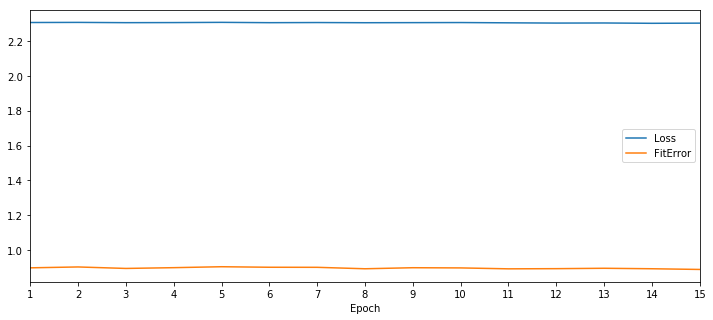

In [32]:
model_vgg16.plot_training_history(fig_size=(15,6))

In [28]:
model_vgg16.evaluate(CIFAR10_test)

[OutputCasTables]

                      casLib              Name   Rows  Columns  \
 0  CASUSERHDFS(viya_sask01)  Valid_Res_Vfz0ZY  10000       17   
 
                                             casTable  
 0  CASTable('Valid_Res_Vfz0ZY', caslib='CASUSERHD...  

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read         10000
 1  Number of Observations Used         10000
 2  Misclassification Error (%)         90.12
 3                   Loss Error      2.302459

+ Elapsed: 4.82s, user: 351s, sys: 38.5s, mem: 3.42e+03mb

In [30]:
model_vgg16.valid_conf_mat

,_label_,Col1,Col2,Col3
0,airplane,1.0,800.0,199.0
1,automobile,2.0,947.0,51.0
2,bird,0.0,916.0,84.0
3,cat,1.0,929.0,70.0
4,deer,2.0,956.0,42.0
5,dog,2.0,895.0,103.0
6,frog,2.0,973.0,25.0
7,horse,1.0,935.0,64.0
8,ship,1.0,865.0,134.0
9,truck,0.0,967.0,33.0
